In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
DB_PATH = "scripts/articles.db"
conn = sqlite3.connect(DB_PATH)

In [2]:
STOCK_SYMBOL = "IBM"

In [3]:
preds = pd.read_sql(f"SELECT * from preds WHERE stock_symbol = '{STOCK_SYMBOL}'", conn)

In [4]:
x_axis = list(preds['date'])

In [5]:
actual = pd.Series(list(preds['close_price']), name='actual')
linear_preds = pd.Series(list(preds['linear_predictions']), name='Linear')
xgb_preds = pd.Series(list(preds['xgb_predictions']), name='XGB')
rfr_preds = pd.Series(list(preds['rfr_predictions']), name='RFR')

Text(0, 0.5, 'Stock Value')

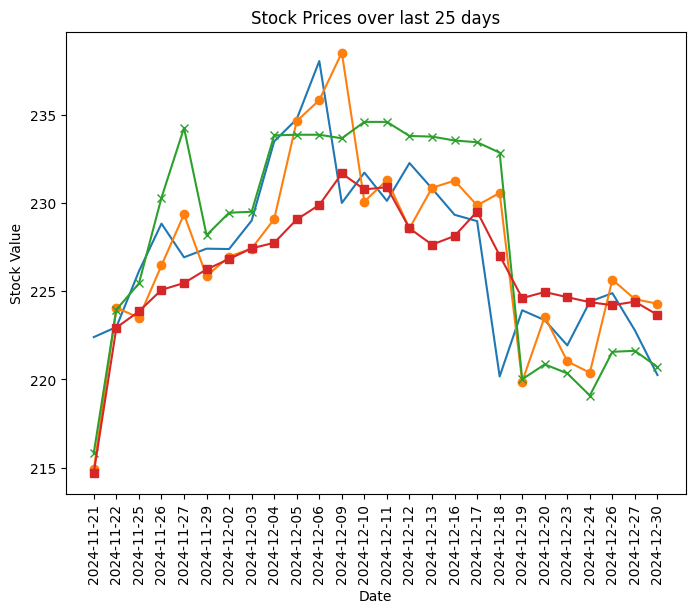

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(x_axis, actual, label=actual.name)
plt.plot(x_axis, linear_preds, label=linear_preds.name, marker='o')
plt.plot(x_axis, xgb_preds, label=xgb_preds.name, marker='x')
plt.plot(x_axis, rfr_preds, label=rfr_preds.name, marker='s')
plt.title('Stock Prices over last 25 days')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Stock Value')
